In [13]:
%matplotlib inline
%load_ext autoreload
! pip install git+https://github.com/avivajpeyi/pspline_psd.git -q

# Example: LISA White Dwarf background

In [5]:
import numpy as np
import pandas as pd
from slipper.example_datasets.lisa_data import lisa_wd_strain

data = lisa_wd_strain()[0:5000]

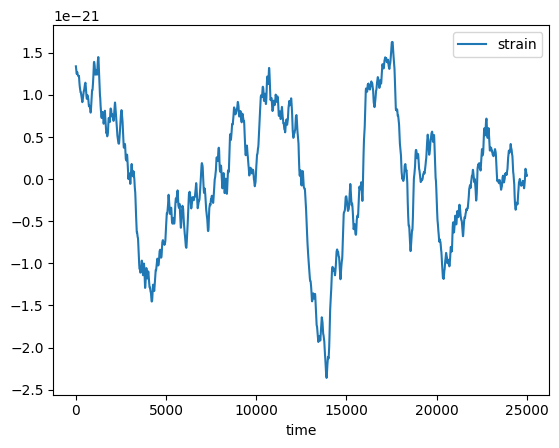

In [6]:
data = pd.DataFrame(data, columns=["strain"])
dt = 5.00000079
data["time"] = np.arange(0, len(data) * dt, dt)
data.plot(x="time", y="strain");

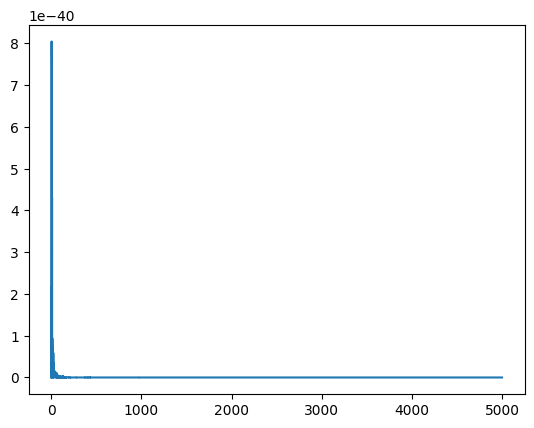

In [7]:
from slipper.fourier_methods import get_periodogram
import matplotlib.pyplot as plt

pdgrm = get_periodogram(timeseries=data.strain.values)
plt.plot(pdgrm)


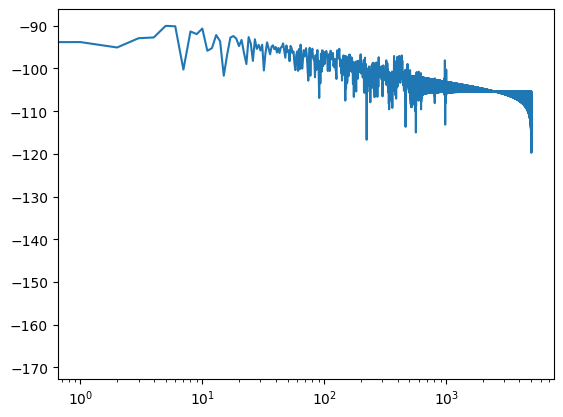

In [8]:
plt.semilogx(np.log(pdgrm))

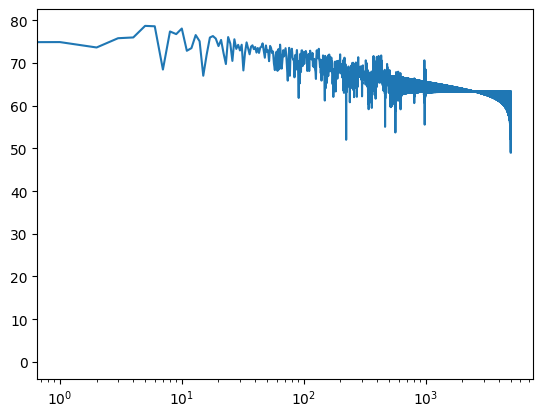

In [9]:
scaled_data = np.log(pdgrm)
scaled_data = scaled_data - np.mean(scaled_data)
scaled_data = scaled_data + np.abs(np.min(scaled_data))
plt.semilogx(scaled_data)



|Slipper|25/09 10:50:24|INFO| Running sampler with the following arguments:
Sampler arguments:
{'Ntotal': 2000,
 'burnin': 1000,
 'n_checkpoint_plts': 0,
 'thin': 1,
 'δα': 0.0001,
 'δβ': 0.0001,
 'τα': 0.001,
 'τβ': 0.001,
 'φα': 1,
 'φβ': 1}
Spline arguments:
{'degree': 3, 'diffMatrixOrder': 2, 'eqSpaced': False, 'k': 30}



MCMC sampling:   0%|          | 0/1999 [00:00<?, ?it/s]

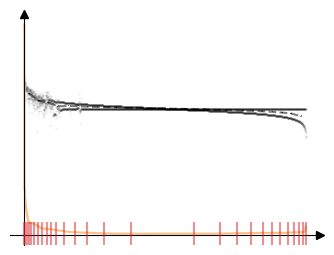

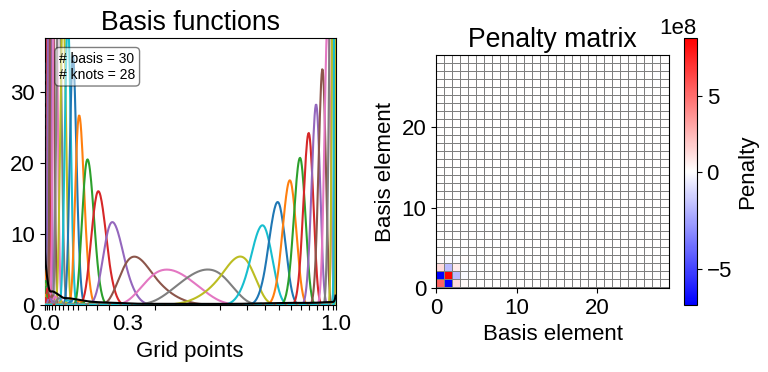

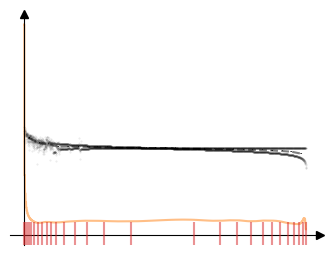

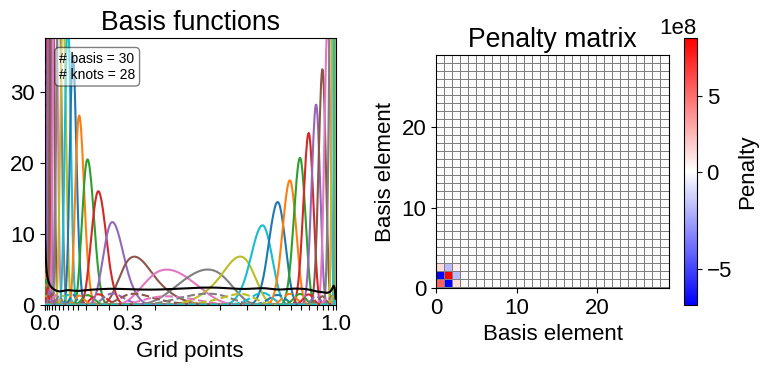

In [11]:
from slipper.sample.spline_model_sampler import fit_data_with_pspline_model



mcmc = fit_data_with_pspline_model(
    data=scaled_data,
    Ntotal=2000,
    burnin=1000,
    degree=3,
    eqSpaced=False,
    
)

Generating Spline posterior:   0%|          | 0/1000 [00:00<?, ?it/s]

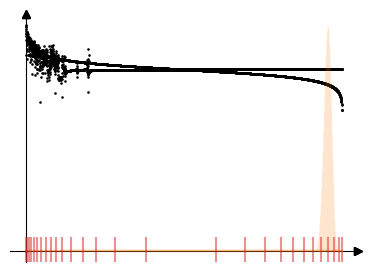

In [13]:
from pspline_psd.plotting.plot_spline_model_and_data import plot_spline_model_and_data

fig = plot_spline_model_and_data(mcmc.data, mcmc.psd_quantiles, knots=mcmc.knots, separarte_y_axis=True)

In [ ]:
# WE NEED A LOG-SPLINE MODEL